In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Create portfolio for the given stocks:Google, amazon and tesla for the last 10 years.**

In [96]:
pip install --upgrade pandas-datareader

In [97]:

from pandas_datareader import data as dr


In [98]:
stocks = ['TSLA', 'GOOGL','AMZN']

In [99]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2012-01-01',end='2022-02-01')['Adj Close']

In [100]:
stock_data.head()

,TSLA,GOOGL,AMZN
Date,,,
2012-01-03,5.616,333.038025,179.029999
2012-01-04,5.542,334.474487,177.509995
2012-01-05,5.424,329.834839,177.610001
2012-01-06,5.382,325.335327,182.610001
2012-01-09,5.450,311.541534,178.559998


In [101]:
stock_data.tail()

,TSLA,GOOGL,AMZN
Date,,,
2022-01-26,937.409973,2584.659912,2777.449951
2022-01-27,829.099976,2580.100098,2792.750000
2022-01-28,846.349976,2667.020020,2879.560059
2022-01-31,936.719971,2706.070068,2991.469971
2022-02-01,931.250000,2752.879883,3023.870117


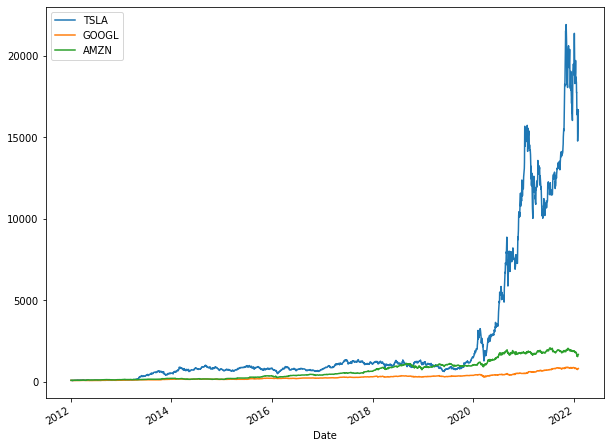

In [102]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

In [103]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,TSLA,GOOGL,AMZN
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013264,0.004304,-0.008526
2012-01-05,-0.021522,-0.013969,0.000563
2012-01-06,-0.007773,-0.013736,0.027763
2012-01-09,0.012556,-0.043324,-0.022428
...,...,...,...
2022-01-26,0.020488,0.017942,-0.007986
2022-01-27,-0.122780,-0.001766,0.005494
2022-01-28,0.020592,0.033134,0.030611


In [104]:
#To obtain annual average returns!
logReturns.mean() * 250 

TSLA     0.503637
GOOGL    0.208134
AMZN     0.278551
dtype: float64

In [105]:
#To obtain annual covariance 
logReturns.cov() * 250 

,TSLA,GOOGL,AMZN
TSLA,0.308315,0.045383,0.054215
GOOGL,0.045383,0.062747,0.043819
AMZN,0.054215,0.043819,0.089977


In [106]:
stock_data.corr()

,TSLA,GOOGL,AMZN
TSLA,1.000000,0.896469,0.818915
GOOGL,0.896469,1.000000,0.941772
AMZN,0.818915,0.941772,1.000000


In [158]:

expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []
weightList2 = []

# Running simulations for finding optimum weights
for i in range(1000):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    weightList2.append(weights[2])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for PG
weightList1 = np.array(weightList1) #Weights for MSFT
weightList2 = np.array(weightList2) #Weights for MSFT
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of TSLA": weightList0, "Weight of GOOGL": weightList1, "Weight of AMZN": weightList2, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of TSLA,Weight of GOOGL,Weight of AMZN,Expected Return,Standard deviation
0,0.418767,0.198548,0.382685,0.358829,0.318278
1,0.323880,0.184555,0.491565,0.338456,0.294720
2,0.561024,0.396859,0.042117,0.376884,0.362380
3,0.567295,0.259496,0.173209,0.387968,0.366201
4,0.398175,0.428861,0.172964,0.337976,0.304272


**4. Formulate the Markowitz frontier.**

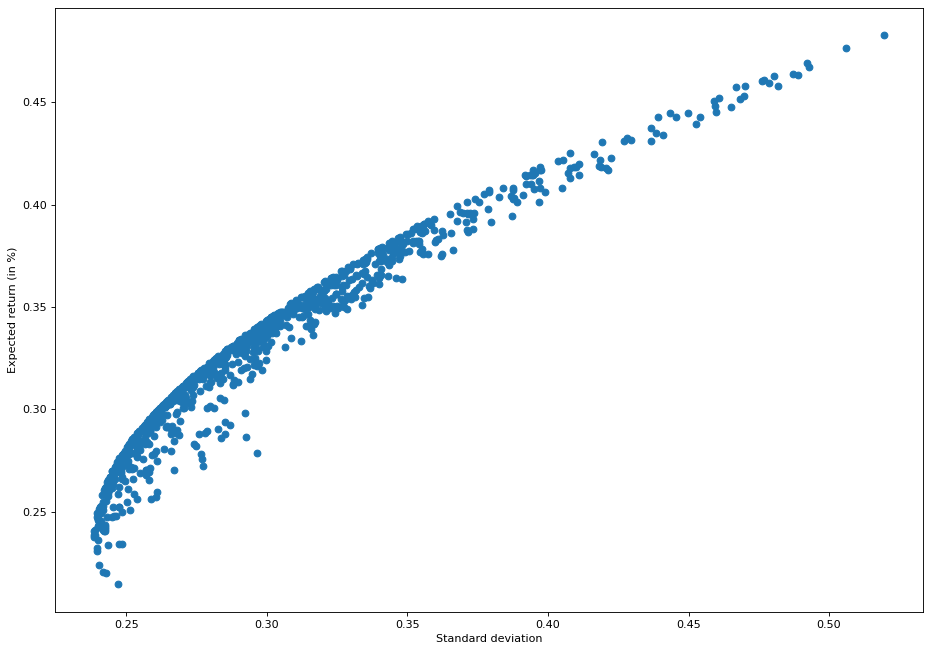

In [108]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [160]:
df["Expected Return"].mean()

0.3299432805929543

In [159]:
df["Expected Return"].sort_values().median()

0.33216667745773154

In [162]:
df[(df["Expected Return"]>0.3299432805929543) & (df["Expected Return"]< 0.33216667745773154)].sort_values(by=['Expected Return'],ascending=False)


,Weight of TSLA,Weight of GOOGL,Weight of AMZN,Expected Return,Standard deviation
785,0.356957,0.380280,0.262763,0.332119,0.292950
220,0.343018,0.336718,0.320263,0.332049,0.290630
502,0.316501,0.252420,0.431078,0.332017,0.288418
223,0.302560,0.208201,0.489238,0.331992,0.288401
360,0.259136,0.070875,0.669989,0.331888,0.293364
578,0.386007,0.478025,0.135968,0.331775,0.300127
489,0.365850,0.415140,0.219011,0.331666,0.294683
763,0.411567,0.563474,0.024959,0.331511,0.309190
431,0.337581,0.328680,0.333739,0.331391,0.289546
598,0.351832,0.377060,0.271109,0.331192,0.291619


In [163]:
df.loc[785]

Weight of TSLA        0.356957
Weight of GOOGL       0.380280
Weight of AMZN        0.262763
Expected Return       0.332119
Standard deviation    0.292950
Name: 785, dtype: float64

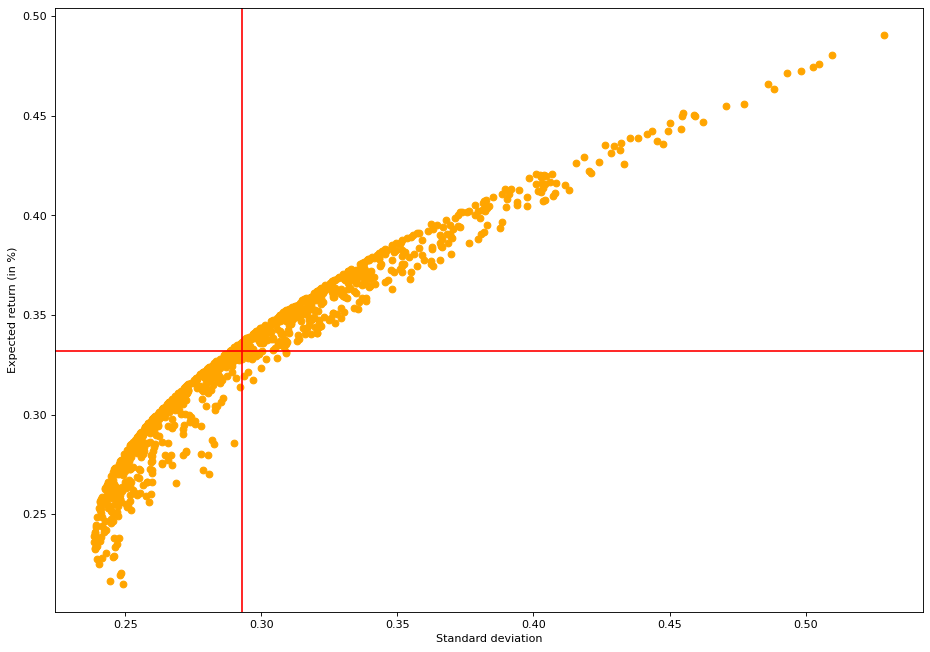

In [164]:
import matplotlib.pyplot as plt
df.reset_index()
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"], color='orange')
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.axvline(x=0.292950,color='red') ##Mean Value
plt.axhline(y=0.332119, color='red') #Median Value
plt.show()

In [165]:
returns = (stock_data/stock_data.shift(1)) - 1       #calculating simple rate of return
returns.head() 

,TSLA,GOOGL,AMZN
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.004313,-0.008490
2012-01-05,-0.021292,-0.013871,0.000563
2012-01-06,-0.007743,-0.013642,0.028152
2012-01-09,0.012635,-0.042399,-0.022178


In [192]:
weightsDifferent = np.array([0.356957,0.3802800, 0.262763])  #Note: the sum of the weights should be equal to 1.
annualReturns = returns.mean()*250

In [193]:
np.dot(annualReturns, weightsDifferent)  # R*WT

0.4113501013979609

In [194]:
portfolioDifferentWeights = str(round(np.dot(annualReturns, weightsDifferent)*100, 5)) + ' %'

In [195]:
print("The cumulative return for portfolio with different weights is ", portfolioDifferentWeights)


The cumulative return for portfolio with different weights is  41.13501 %


In [171]:
!pip install quandl

In [172]:
import quandl

In [173]:
start = '2012-01-01'
end='2022-02-01'

TSLA=quandl.get('WIKI/TSLA.11',start_date=start,end_date=end)
GOOGL=quandl.get('WIKI/GOOGL.11',start_date=start,end_date=end)
AMZN=quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [196]:
for stock_df in (TSLA,GOOGL,AMZN):
    stock_df['Normed Return']=stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [197]:
for stock_df,allo in zip([TSLA,GOOGL,AMZN],[0.356957,0.3802800, 0.262763]):
    stock_df['Allocation']=stock_df['Normed Return']*allo

INVESTMENT


In [198]:
for stock_df in (TSLA,GOOGL,AMZN):
    stock_df['Position Values']=stock_df['Allocation']*1000000

In [199]:
portfolio_val=pd.concat([TSLA['Position Values'],GOOGL['Position Values'],AMZN['Position Values']],axis=1)

In [200]:
portfolio_val.columns=['TSLA Pos','GOOGL Pos','AMZN Pos']

In [201]:
portfolio_val.head()

,TSLA Pos,GOOGL Pos,AMZN Pos
Date,,,
2012-01-03,356957.000000,380280.000000,262763.000000
2012-01-04,352253.506766,381920.197172,260532.090320
2012-01-05,344753.341880,376622.417457,260678.860694
2012-01-06,342083.791667,371484.656978,268017.379378
2012-01-09,346405.920584,355734.192152,262073.179244


In [202]:
portfolio_val['Total Pos']=portfolio_val.sum(axis=1)

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline

**2. Visualize the expected returns on the 10 years series.**

Text(0.5, 1.0, 'Total Portfolio Value')

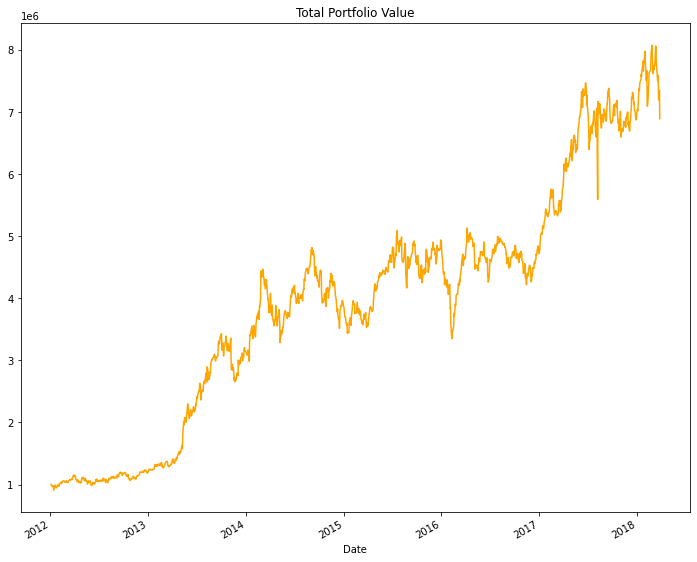

In [204]:
portfolio_val['Total Pos'].plot(figsize=(12,10),color='orange')
plt.title('Total Portfolio Value')

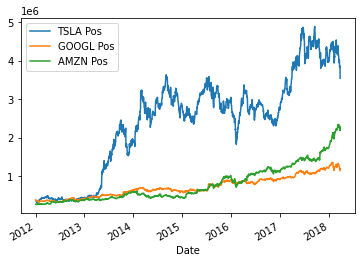

In [205]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

In [206]:
portfolio_val['Total Pos'].pct_change(1)

Date
2012-01-03         NaN
2012-01-04   -0.005294
2012-01-05   -0.012719
2012-01-06   -0.000477
2012-01-09   -0.017698
                ...   
2018-03-21    0.008923
2018-03-22   -0.025872
2018-03-23   -0.026726
2018-03-26    0.021318
2018-03-27   -0.062280
Name: Total Pos, Length: 1567, dtype: float64

In [207]:
portfolio_val['Daily Returns']=portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,TSLA Pos,GOOGL Pos,AMZN Pos,Total Pos,Daily Returns
Date,,,,,
2012-01-03,3.569570e+05,3.802800e+05,2.627630e+05,1.000000e+06,NaN
2012-01-04,3.522535e+05,3.819202e+05,2.605321e+05,9.947058e+05,-0.005294
2012-01-05,3.447533e+05,3.766224e+05,2.606789e+05,9.820546e+05,-0.012719
2012-01-06,3.420838e+05,3.714847e+05,2.680174e+05,9.815858e+05,-0.000477
2012-01-09,3.464059e+05,3.557342e+05,2.620732e+05,9.642133e+05,-0.017698
...,...,...,...,...,...
2018-03-21,4.023775e+06,1.246576e+06,2.321702e+06,7.592053e+06,0.008923
2018-03-22,3.929324e+06,1.200029e+06,2.266281e+06,7.395634e+06,-0.025872
2018-03-23,3.833220e+06,1.169719e+06,2.195039e+06,7.197978e+06,-0.026726


**3. Evaluate the annual daily mean, correlation,   Sharpe ratio and daily standard mean.**


AVG Daily Return

In [209]:
portfolio_val['Daily Returns'].mean()

0.0014690953537660981

STD Daily Return

In [210]:
portfolio_val['Daily Returns'].std()

0.02179874900915436

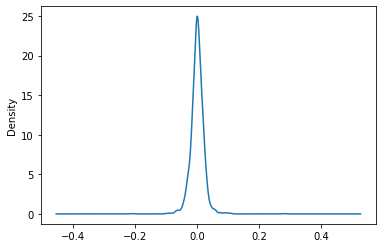

In [211]:
portfolio_val['Daily Returns'].plot(kind='kde')

**SHARPIE Ratio**


In [212]:
SR=portfolio_val['Daily Returns'].mean()/portfolio_val['Daily Returns'].std()
SR

0.0673935624998092

In [213]:
ASR=(252**0.5)*SR
ASR

1.0698396380471018

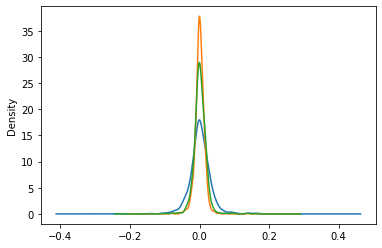

In [214]:
TSLA['Adj. Close'].pct_change(1).plot(kind='kde')
GOOGL['Adj. Close'].pct_change(1).plot(kind='kde')
AMZN['Adj. Close'].pct_change(1).plot(kind='kde')


**5. Discuss on the optimal portfolio and the different parameters evaluated for the portfolio.**

**To create an optimal portfolio, we evaluated parameters like, mean and median of the expected returns and then we chose the portfolio where the Expected Returns were between mean and median.
An optimum portfolio is where the risk and reward ratio is less.**